# Assignment 1 (ST813)

## Exercise 1

### (Data Exploration)

In [1]:
# load data
load("Data_ST523_813_E2024.rdata")

In [2]:
ls()

[1] "data"

In [3]:
head(data)

,Adress,District,Postcode,Price,Pricesqm,Dato,Type,Energyclass,Surface,Rooms,Toilets,Roof,Yearc
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,"Kastanievej 74, 2. 13.",Odense,5230,1461538,22144.52,2024-09-30,Apartment,C,66,2,1,Roof tile,1992
2,"Kastanievej 74, 2. 12.",Odense,5230,1461538,20879.12,2024-09-30,Apartment,C,70,2,1,Roof tile,1992
3,"Kastanievej 74, 2. 11.",Odense,5230,1461538,20879.12,2024-09-30,Apartment,C,70,2,1,Roof tile,1992
4,"Kastanievej 74, 2. 10.",Odense,5230,1461538,22144.52,2024-09-30,Apartment,C,66,2,1,Roof tile,1992
5,"Kastanievej 74, 1. 9.",Odense,5230,1461538,22144.52,2024-09-30,Apartment,C,66,2,1,Roof tile,1992
6,"Kastanievej 74, 1. 8.",Odense,5230,1461538,20879.12,2024-09-30,Apartment,C,70,2,1,Roof tile,1992


In [4]:
dim(data)

[1] 135  13

The data contains 13 variables with 135 observations.

In [5]:
str(data)

'data.frame':	135 obs. of  13 variables:
 $ Adress     : chr  "Kastanievej 74, 2. 13." "Kastanievej 74, 2. 12." "Kastanievej 74, 2. 11." "Kastanievej 74, 2. 10." ...
 $ District   : chr  "Odense" "Odense" "Odense" "Odense" ...
 $ Postcode   : Factor w/ 6 levels "5000","5200+5210",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Price      : num  1461538 1461538 1461538 1461538 1461538 ...
 $ Pricesqm   : num  22145 20879 20879 22145 22145 ...
 $ Dato       : Date, format: "2024-09-30" "2024-09-30" ...
 $ Type       : Factor w/ 3 levels "Apartment","Rowhouse",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Energyclass: Factor w/ 7 levels "A","B","C","D",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Surface    : num  66 70 70 66 66 70 70 66 66 70 ...
 $ Rooms      : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Toilets    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Roof       : Factor w/ 3 levels "Roof tile","Other material",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Yearc      : num  1992 1992 1992 1992 1992 ...


- Catergorical variables: Adress, District, Postcode, Type, Energyclass, Rooms, Toilets, Roof, Year.
- Continuous variables: Price, Pricesqm, Dato, Surface.

Relevant summary measures:
- Frequency Counts (categorical data).
- Mode.
- Mean.
- Median. 
- Minimum.
- Maximum. 
- Range.
- Standard Deviation.

In [2]:
summary(data)

    Adress            District                   Postcode      Price        
 Length:135         Length:135         5000          :25   Min.   : 745000  
 Class :character   Class :character   5200+5210     :26   1st Qu.:1461538  
 Mode  :character   Mode  :character   5220+5250+5260:29   Median :1635000  
                                       5230          :27   Mean   :2146680  
                                       5240+5320     : 9   3rd Qu.:2375000  
                                       5270          :19   Max.   :9500000  
                                                                            
    Pricesqm          Dato                   Type     Energyclass
 Min.   : 6250   Min.   :2024-08-09   Apartment:39   C      :47  
 1st Qu.:14051   1st Qu.:2024-08-21   Rowhouse :31   D      :47  
 Median :19695   Median :2024-08-31   Villa    :65   E      :11  
 Mean   :19321   Mean   :2024-09-03                  F      : 6  
 3rd Qu.:22150   3rd Qu.:2024-09-15                  B

In [6]:
library(dplyr)
library(tidyr)
library(knitr)

# Unique Addresses Count
unique_addresses_count <- data.frame(`Unique Addresses Count` = n_distinct(data$Adress))

# Count of unique districts and years
unique_districts_count <- data.frame(`Unique Districts Count` = n_distinct(data$District))
unique_years_count <- data.frame(`Unique Years Count` = n_distinct(data$Yearc))

# Frequency for Postcode
postcode_freq <- data %>%
  count(Postcode) %>%
  arrange(desc(n)) %>%
  rename(Frequency = n)

# Frequency for Type
type_freq <- data %>%
  count(Type) %>%
  arrange(desc(n)) %>%
  rename(Frequency = n)

# Frequency for Energy Class
energyclass_freq <- data %>%
  count(Energyclass) %>%
  arrange(desc(n)) %>%
  rename(Frequency = n)

# Frequency for Roof
roof_freq <- data %>%
  count(Roof) %>%
  arrange(desc(n)) %>%
  rename(Frequency = n)

# Summary statistics for Rooms
rooms_summary <- data %>%
  summarise(
    `Rooms Mean` = mean(Rooms, na.rm = TRUE),
    `Rooms Median` = median(Rooms, na.rm = TRUE),
    `Rooms Mode` = as.numeric(names(which.max(table(Rooms)))),
    `Rooms Min` = min(Rooms, na.rm = TRUE),
    `Rooms Max` = max(Rooms, na.rm = TRUE),
    `Rooms Range` = max(Rooms, na.rm = TRUE) - min(Rooms, na.rm = TRUE),
    `Rooms SD` = sd(Rooms, na.rm = TRUE)
  )

# Summary statistics for Toilets
toilets_summary <- data %>%
  summarise(
    `Toilets Mean` = mean(Toilets, na.rm = TRUE),
    `Toilets Median` = median(Toilets, na.rm = TRUE),
    `Toilets Mode` = as.numeric(names(which.max(table(Toilets)))),
    `Toilets Min` = min(Toilets, na.rm = TRUE),
    `Toilets Max` = max(Toilets, na.rm = TRUE),
    `Toilets Range` = max(Toilets, na.rm = TRUE) - min(Toilets, na.rm = TRUE),
    `Toilets SD` = sd(Toilets, na.rm = TRUE)
  )

# Summary statistics for Price
price_summary <- data %>%
  summarise(
    `Price Mean` = mean(Price, na.rm = TRUE),
    `Price Median` = median(Price, na.rm = TRUE),
    `Price Mode` = as.numeric(names(which.max(table(Price)))),
    `Price Min` = min(Price, na.rm = TRUE),
    `Price Max` = max(Price, na.rm = TRUE),
    `Price Range` = max(Price, na.rm = TRUE) - min(Price, na.rm = TRUE),
    `Price SD` = sd(Price, na.rm = TRUE)
  )

# Summary statistics for Price per sqm
price_per_sqm_summary <- data %>%
  summarise(
    `Price per sqm Mean` = mean(Pricesqm, na.rm = TRUE),
    `Price per sqm Median` = median(Pricesqm, na.rm = TRUE),
    `Price per sqm Mode` = as.numeric(names(which.max(table(Pricesqm)))),
    `Price per sqm Min` = min(Pricesqm, na.rm = TRUE),
    `Price per sqm Max` = max(Pricesqm, na.rm = TRUE),
    `Price per sqm Range` = max(Pricesqm, na.rm = TRUE) - min(Pricesqm, na.rm = TRUE),
    `Price per sqm SD` = sd(Pricesqm, na.rm = TRUE)
  )

# Summary statistics for Surface
surface_summary <- data %>%
  summarise(
    `Surface Mean` = mean(Surface, na.rm = TRUE),
    `Surface Median` = median(Surface, na.rm = TRUE),
    `Surface Mode` = as.numeric(names(which.max(table(Surface)))),
    `Surface Min` = min(Surface, na.rm = TRUE),
    `Surface Max` = max(Surface, na.rm = TRUE),
    `Surface Range` = max(Surface, na.rm = TRUE) - min(Surface, na.rm = TRUE),
    `Surface SD` = sd(Surface, na.rm = TRUE)
  )

# Summary for Dates
date_summary <- data.frame(
  `Dato Min` = min(data$Dato, na.rm = TRUE),
  `Dato Max` = max(data$Dato, na.rm = TRUE),
  `Unique Dates Count` = length(unique(data$Dato))
)

# Display each table
cat("Unique Addresses Count\n")
kable(unique_addresses_count)

cat("\nUnique Districts Count\n")
kable(unique_districts_count)

cat("\nUnique Years Count\n")
kable(unique_years_count)

cat("\nPostcode Frequency\n")
kable(postcode_freq)

cat("\nType Frequency\n")
kable(type_freq)

cat("\nEnergy Class Frequency\n")
kable(energyclass_freq)

cat("\nRoof Frequency\n")
kable(roof_freq)

cat("\nRooms Summary\n")
kable(rooms_summary)

cat("\nToilets Summary\n")
kable(toilets_summary)

cat("\nPrice Summary\n")
kable(price_summary)

cat("\nPrice per sqm Summary\n")
kable(price_per_sqm_summary)

cat("\nSurface Summary\n")
kable(surface_summary)

cat("\nDate Summary\n")
kable(date_summary)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Unique Addresses Count




| Unique.Addresses.Count|
|----------------------:|
|                    135|


Unique Districts Count




| Unique.Districts.Count|
|----------------------:|
|                     28|


Unique Years Count




| Unique.Years.Count|
|------------------:|
|                 60|


Postcode Frequency




|Postcode       | Frequency|
|:--------------|---------:|
|5220+5250+5260 |        29|
|5230           |        27|
|5200+5210      |        26|
|5000           |        25|
|5270           |        19|
|5240+5320      |         9|


Type Frequency




|Type      | Frequency|
|:---------|---------:|
|Villa     |        65|
|Apartment |        39|
|Rowhouse  |        31|


Energy Class Frequency




|Energyclass | Frequency|
|:-----------|---------:|
|C           |        47|
|D           |        47|
|NA          |        14|
|E           |        11|
|F           |         6|
|B           |         5|
|A           |         4|
|G           |         1|


Roof Frequency




|Roof                            | Frequency|
|:-------------------------------|---------:|
|Roof tile                       |        78|
|Fibre cement including asbestos |        40|
|Other material                  |        17|


Rooms Summary




| Rooms Mean| Rooms Median| Rooms Mode| Rooms Min| Rooms Max| Rooms Range| Rooms SD|
|----------:|------------:|----------:|---------:|---------:|-----------:|--------:|
|   3.866667|            4|          4|         1|         8|           7| 1.596638|


Toilets Summary




| Toilets Mean| Toilets Median| Toilets Mode| Toilets Min| Toilets Max| Toilets Range| Toilets SD|
|------------:|--------------:|------------:|-----------:|-----------:|-------------:|----------:|
|     1.437037|              1|            1|           1|           3|             2|  0.5935902|


Price Summary




| Price Mean| Price Median| Price Mode| Price Min| Price Max| Price Range| Price SD|
|----------:|------------:|----------:|---------:|---------:|-----------:|--------:|
|    2146680|      1635000|    1461538|    745000|   9500000|     8755000|  1351308|


Price per sqm Summary




| Price per sqm Mean| Price per sqm Median| Price per sqm Mode| Price per sqm Min| Price per sqm Max| Price per sqm Range| Price per sqm SD|
|------------------:|--------------------:|------------------:|-----------------:|-----------------:|-------------------:|----------------:|
|           19320.96|             19694.74|           20879.12|              6250|          42465.75|            36215.75|         6809.605|


Surface Summary




| Surface Mean| Surface Median| Surface Mode| Surface Min| Surface Max| Surface Range| Surface SD|
|------------:|--------------:|------------:|-----------:|-----------:|-------------:|----------:|
|     112.3481|            100|           66|          38|         300|           262|   48.31077|


Date Summary




|Dato.Min   |Dato.Max   | Unique.Dates.Count|
|:----------|:----------|------------------:|
|2024-08-09 |2024-09-30 |                 41|

Reporting percentage of missing values.

In [7]:
# Function to calculate percentage of missing values
missing_percentage <- function(df) {
  sapply(df, function(x) sum(is.na(x)) / length(x) * 100)
}
missing_values <- missing_percentage(data)
# Display Missing Values Percentage
cat("\nPercentage of Missing Values for Each Variable\n")
missing_values_df <- data.frame(
  Variable = names(missing_values),
  `Missing Percentage` = missing_values
)
kable(missing_values_df)


Percentage of Missing Values for Each Variable




|            |Variable    | Missing.Percentage|
|:-----------|:-----------|------------------:|
|Adress      |Adress      |            0.00000|
|District    |District    |            0.00000|
|Postcode    |Postcode    |            0.00000|
|Price       |Price       |            0.00000|
|Pricesqm    |Pricesqm    |            0.00000|
|Dato        |Dato        |            0.00000|
|Type        |Type        |            0.00000|
|Energyclass |Energyclass |           10.37037|
|Surface     |Surface     |            0.00000|
|Rooms       |Rooms       |            0.00000|
|Toilets     |Toilets     |            0.00000|
|Roof        |Roof        |            0.00000|
|Yearc       |Yearc       |            0.00000|

Only the variable `Energyclass` has missing values, which account for $10\%$ of the data for said variable.

### (Two-way ANOVA)

In this scenario, a linear model is considered, `Pricesqm` as a response and `Roof`,`Postcode` as only predictors. 

a) Create scatter plots

In [6]:
# response variable: Pricesqm
# predictor variables: Roof, Postcode
# scatterplot of the response versus the two factors (reflect both factors simultaneously)
library(ggplot2)
library(gridExtra)
plot1 <- ggplot(data, aes(x = Roof, y = Pricesqm, color = Postcode)) +
  geom_point() +
  labs(title = "Scatterplot of Price per sqm versus Roof and Postcode") +
  theme_minimal()
plot2 <- ggplot(data, aes(x = Postcode, y = Pricesqm, color = Roof)) +
  geom_point() +
  labs(title = "Scatterplot of Price per sqm versus Roof and Postcode") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [9]:
#save plot2
ggsave("scatter.pdf", plot2, width = 10, height = 6, units = "in", dpi = 300)


b) Conduct a two-way analysis of variances including an interaction to analyse the data.

In [2]:
# two-way analysis of variances.
data$Roof <- as.factor(data$Roof)
data$Postcode <- as.factor(data$Postcode)

# Fit the two-way ANOVA model including interaction
anova_model <- aov(Pricesqm ~ Roof * Postcode, data = data)

# Display the summary of the model
summary(anova_model)

               Df    Sum Sq   Mean Sq F value   Pr(>F)    
Roof            2 3.128e+08 156382404   4.440   0.0138 *  
Postcode        5 1.575e+09 315047281   8.946 3.21e-07 ***
Roof:Postcode  10 2.052e+08  20518893   0.583   0.8254    
Residuals     117 4.120e+09  35217827                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
# Rename levels of the Roof factor for the plot
levels(data$Roof)[levels(data$Roof) == "Fibre cement including asbestos"] <- "Fibre cement"
# Open a PDF device
pdf("interaction_plot.pdf", width = 9, height = 6)  # Adjust width and height as needed
my_colors <- c(             ## add the standard plotly colors
  'red',  
  'blue',  
  'green',  
  'yellow'
) 

# Adjust margins to make space for the external legend if needed
par(mar = c(5, 4, 4, 8))

# Create the interaction plot without any trace label or built-in legend
interaction.plot(data$Postcode, data$Roof, data$Pricesqm,
                 col = my_colors,
                 xlab = "Postcode", ylab = "Price per sqm",
                 trace.label = "Roof Type",
                 cex.lab = 0.9,
                 cex.axis = 0.8)

mtext("Scatterplot of Price per sqm by Postcode and Roof Type")
      
# Close the PDF device
dev.off()


pdf 
  2

Comment on results.

a) The statistical model for a two-way ANOVA with interaction is:

Pricesqm $_{i j k}=\mu+\alpha_i+\beta_j+(\alpha \beta)_{i j}+\epsilon_{i j k}$

Where:
- $\mu$ is the overall mean of `Pricesqm`.
- $\alpha_i$ is the effect of the $i$-th level of `Roof`.
- $\beta_j$ is the effect on the $j$-th level of `Postcode`.
- $(\alpha \beta)_{i j}$ represents the interaction effect between `Roof` and `Postcode`.
- $\epsilon_{i j k}$ are the random errors, assumed to be normally distributed with mean zero and constant variance.

b) Investigated null hypothesis and alternative hypothesis:

For the interaction term one can test:
- Null Hypothesis ($H_0$): There is no interaction effect between `Roof` and `Postcode` on `Pricesqm` ($(\alpha \beta)_{i j}=0$ for all $\left.i, j\right)$).
- Alternative Hypothesis ($H_1$): There is an interaction effect between `Roof` and `Postcode` on `Pricesqm` ($(\alpha \beta)_{i j} \neq 0$ for all $\left.i, j\right)$).

c) Observed value of the test statistic:

F-statistic for the interaction term, which quantifies the ratio of the mean square of the interaction to the mean square of the residuals, which is given from the output for the ANOVA model.

d) Null distribution and corresponding degrees of freedom:

The test statistic follows an F-distribution under the null hypothesis. The degrees of freedom for the interaction term correspond to.
- Numerator degrees of freedom: (# of levels of Roof − 1)×(# of levels of Postcode − 1)
- Denominator degrees of freedom: based on the residuals.

e) p-value:

The p-value indicates the probability of observing the test statistic under the null hypothesis. A small p-value (typically $< 0.05$) would suggest significant interaction effects between `Roof` and `Postcode` on `Pricesqm`. 

SUMMARY: 
- No significant interaction between `Roof` and `Postcode`, suggesting they independently affect `Pricesqm`. 
- Both `Roof` and `Postcode` individually have an significant impact on `Pricesqm`, with `Postcode` having a particularily strong effect.

c) Continue the statistical analysis and test the preference of additive effects of `Roof` and `Postcode` onto the sales price.

To conduct the test:
1. Fit an additive model. (Include only the main effects of `Roof` and `Postcode` without the interaction.)
2. Fit a full model. (Include both main effects and the interaction term.)
3. Compare models. (Use an ANOVA comparison to evaluate whether the interaction term significantly improves the fit of the model.)

In [5]:
# Fit the additive model (no interaction term)
additive_model <- aov(Pricesqm ~ Roof + Postcode, data = data)

# Fit the full model (with interaction term)
interaction_model <- aov(Pricesqm ~ Roof * Postcode, data = data)

# Compare the two models
anova_comparison <- anova(additive_model, interaction_model)
anova_comparison

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,127,4325674673,NA,NA,NA,NA
2,117,4120485738,10,205188934,0.582628,0.8254191


The results suggest that modelling `Pricesqm` as an additive function of `Roof` and `Postcode` is sufficient. There is no significant evidence that the interaction between `Roof` and `Postcode` contributes to explaining variations in `Pricesqm`, so it’s reasonable to simplify the model by excluding the interaction term.

In [7]:
# Load the emmeans package
if (!requireNamespace("emmeans", quietly = TRUE)) {
  install.packages("emmeans")
}
library(emmeans)

# Fit the additive model
additive_model <- aov(Pricesqm ~ Roof + Postcode, data = data)

# Get estimated marginal means for each combination of Roof and Postcode
means_table <- emmeans(additive_model, ~ Roof + Postcode)

# Convert the output to a data frame for better readability
means_df <- as.data.frame(means_table)

# Print the results
print(means_df)

#save the results as a csv file
write.csv(means_df, "means_df.csv")


 Roof                            Postcode         emmean       SE  df  lower.CL
 Roof tile                       5000           24049.94 1217.084 127 21641.549
 Other material                  5000           24560.17 1865.489 127 20868.706
 Fibre cement including asbestos 5000           22603.70 1457.535 127 19719.503
 Roof tile                       5200+5210      18404.71 1289.733 127 15852.561
 Other material                  5200+5210      18914.94 1854.320 127 15245.580
 Fibre cement including asbestos 5200+5210      16958.47 1299.219 127 14387.553
 Roof tile                       5220+5250+5260 17999.72 1186.280 127 15652.287
 Other material                  5220+5250+5260 18509.96 1737.284 127 15072.183
 Fibre cement including asbestos 5220+5250+5260 16553.48 1337.943 127 13905.936
 Roof tile                       5230           23749.83 1141.274 127 21491.452
 Other material                  5230           24260.06 1863.569 127 20572.394
 Fibre cement including asbestos 5230   

Explanation of the Output Table (the resulting table (means_df))
- Roof: Levels of the `Roof` factor.
- Postcode: Levels of the `Postcode` factor.
- emmean: Estimated mean of `Pricesqm` for each combination of `Roof` and `Postcode`.
- SE: Standard error for each estimated mean.
- df: Degrees of freedom associated with the estimate.
- lower.CL and upper.CL: Confidence interval bounds for each estimate.

e) How much variation in `Pricesqm` is explained by the two factors?

Calculate the coefficient of determination ($R^2$) for the model. This is the proportion of the total variance explained by the model, calculated as:

$R^2=1-\frac{\text { Residual Sum of Squares (RSS) }}{\text { Total Sum of Squares (TSS) }}$

Additionally, the absolute reduction in the residual sum of squares is found by comparing the Total Sum of Squares (TSS) (from the null model with no predictors) to the Residual Sum of Squares (RSS) in the additive model.

1. Fit the null model (a model with only the intercept, providing TSS).
2. Fit the additive model (model with the two predictors, providing RSS).
3. Calculate $R^2$ and RRS reduction.

In [6]:
# Fit the null model to get the total sum of squares (TSS)
null_model <- aov(Pricesqm ~ 1, data = data)
TSS <- sum((data$Pricesqm - mean(data$Pricesqm))^2)  # or `sum(residuals(null_model)^2)`

# Fit the additive model (without interaction) to get the residual sum of squares (RSS)
additive_model <- aov(Pricesqm ~ Roof + Postcode, data = data)
RSS <- sum(residuals(additive_model)^2)

# Calculate R²
R_squared <- 1 - (RSS / TSS)

# Absolute reduction in RSS
RSS_reduction <- TSS - RSS

# Output results
list(Total_Sum_of_Squares = TSS, Residual_Sum_of_Squares = RSS, R_squared = R_squared, RSS_reduction = RSS_reduction)

$Total_Sum_of_Squares
[1] 6213675885

$Residual_Sum_of_Squares
[1] 4325674673

$R_squared
[1] 0.3038461

$RSS_reduction
[1] 1888001212

- TSS: measure of total variability in `Pricesqm` without accounting for predictors. 
- RRS: measure of total variability in `Pricesqm` that remains unexplained by the model. 
- $R^2$: the proportion of variability in `Pricesqm` explained by the two predictors. 
- RSS Reduction: The absolute reduction in RSS, indicating how much the variability is reduced by including `Roof` and `Postcode` as predictors.

Results from the table confirm that `Roof` and `Postcode` explain a substantial, though not overwhelming, part of the variability in sales price per square meter. The additive model effectively captures some of the variation in housing prices, but other factors may also contribute to the remaining unexplained variance.

### (Model Extensions)

Consider an extended statistical model for `Pricesqm`, by including `Type`, `Yearc`, and `Surface`. Compare the extended model with the two-way model. 

1. Fit two-way model (includes `Roof` and `Postcode`).
2. Fit the extended model (`Roof`, `Postcode`, `Type`, `Yearc`, and `Surface`).
3. Conduct ANOVA comparison.

- Null Hypothesis: simpler two-way model is sufficient to explain the variability in `Pricesqm`.
- Alternative Hypothesis: the extended model significantly improves the fit. 

In [7]:
# Fit the two-way model (with only Roof and Postcode)
two_way_model <- aov(Pricesqm ~ Roof + Postcode, data = data)

# Fit the extended model (adding Type, Yearc, and Surface)
extended_model <- aov(Pricesqm ~ Roof + Postcode + Type + Yearc + Surface, data = data)

# Perform ANOVA comparison
anova_comparison <- anova(two_way_model, extended_model)
anova_comparison

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,127,4325674673,NA,NA,NA,NA
2,123,4031944023,4,293730650,2.240164,0.06852227


The extended model explains more variance (lower RSS) than the two-way model, which is a positive indicator of its performance. However, the improvement in fit is marginal and not statistically significant at the conventional alpha level ($0.05$). This suggests that while the extended model may be better, the evidence is not strong enough to claim that the extended model significantly improves upon the two-way model.

### (Residual Diagnostics)

Perform a graphical check of the most inclusive model.
- Calculate standardised residuals and fitted values.
- Create two residual plots (residuals versus fitted values, QQ-plot)

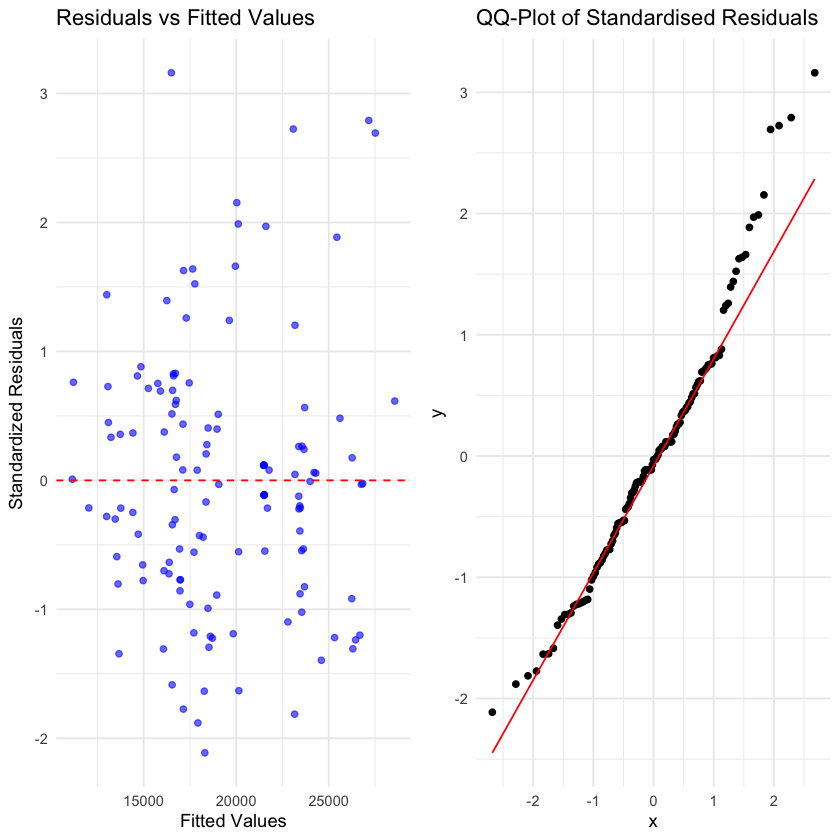

In [16]:
# Fit the extended model (Roof, Postcode, Type, Yearc, Surface)
extended_model <- lm(Pricesqm ~ Roof + Postcode + Type + Yearc + Surface, data = data)

# Calculate standardized residuals and fitted values
data$standardized_residuals <- rstandard(extended_model)
data$fitted_values <- fitted(extended_model)

# Load plotting libraries
library(ggplot2)
library(ggpubr)

# Plot 1: Residuals vs Fitted Values
residuals_vs_fitted <- ggplot(data, aes(x = fitted_values, y = standardized_residuals)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values", x = "Fitted Values", y = "Standardized Residuals") +
  theme_minimal()

# Plot 2: QQ-Plot
qq_plot <- ggplot(data, aes(sample = standardized_residuals)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(title = "QQ-Plot of Standardised Residuals") +
  theme_minimal()
# Arrange plots side by side
ggarrange(residuals_vs_fitted, qq_plot, ncol = 2, nrow = 1)


In [17]:
# save the plots together
ggsave("residuals_qq_plot.pdf", ggarrange(residuals_vs_fitted, qq_plot, ncol = 2, nrow = 1), width = 12, height = 6, units = "in", dpi = 300)

## Exercise 2

## Exercise 3

Consider a linear regression model with response $y$, an intercept, and two explanatory variables $x_1$ and $x_2$

$y_i=\beta_1+\beta_2 x_{i 1}+\beta_3 x_{i 2}+\varepsilon_{i,} \quad i=1 \ldots, n$,

The errors $\varepsilon_1 ,..., \varepsilon_n$ are independent, centered, and have a common variance $\sigma^2$, and let $\hat{\beta}_1, \hat{\beta}_2$ and $\hat{\beta}_3$ be the least square estimators for $\beta_1$, $\beta_2$, and $\beta_3$. 

Assume the sample correlation of the two explanatory variables $x_1$ and $x_2$ is positive ($r_{x_1, x_2}>0$).

2. Write a small simulation program in R that confirms the above point. Especially this should  involve the following steps: For  a  model  matrix  of  your  choice  corresponding to (1) and (2),
- Simulate the response
- Calculate the least square estimates
- Repeat these steps a sufficient number of times
- Confirm 1. using suitable plots and summary measures of the obtained sample of LS-estimates

Moreover, use your own commands for the repeated calculation of LS-estimates during the simulation,i.e. do not use built-in functions for model fitting such as lm. It should be possible to reproduce your simulation.

In [19]:
# Set parameters
set.seed(123)    # Set seed for reproducibility
n <- 100         # Number of observations
num_sim <- 1000  # Number of simulations
rho <- 0.7       # Desired positive correlation between x1 and x2

# Preallocate a vector to store estimates of beta2 and beta3
beta2_estimates <- numeric(num_sim)
beta3_estimates <- numeric(num_sim)

# Run the simulation
for (i in 1:num_sim) {
  # Generate correlated x1 and x2
  Sigma <- matrix(c(1, rho, rho, 1), nrow = 2)  # Covariance matrix for x1 and x2
  x <- MASS::mvrnorm(n, mu = c(0, 0), Sigma = Sigma)  # Generate correlated data
  x1 <- x[, 1]
  x2 <- x[, 2]
  
  # Generate response variable y
  beta1 <- 1; beta2 <- 2; beta3 <- -3
  y <- beta1 + beta2 * x1 + beta3 * x2 + rnorm(n, mean = 0, sd = 1)
  
  # Fit linear model
  fit <- lm(y ~ x1 + x2)
  
  # Store estimates of beta2 and beta3
  beta2_estimates[i] <- coef(fit)["x1"]
  beta3_estimates[i] <- coef(fit)["x2"]
}

# Calculate and display the correlation between beta2 and beta3 estimates
correlation <- cor(beta2_estimates, beta3_estimates)
cat("Correlation between beta2 and beta3 estimates across simulations:", correlation, "\n")


Correlation between beta2 and beta3 estimates across simulations: -0.6895159 
